At this stage, we will do a detailed backtest for individual pairs

In [802]:
import numpy as np
import pandas as pd
import pickle

### GET SELECTED TICKERS

In [803]:
with open('pairs_final.pkl', 'rb') as f:
    pairs_dic = pickle.load(f)
pairs_dic

{('CMS', 'DUK'): 1.6,
 ('CNP', 'VST'): 0.78,
 ('VST', 'WEC'): 4.17,
 ('NRG', 'VST'): 0.59,
 ('SO', 'VST'): 0.32,
 ('AEP', 'VST'): 0.25,
 ('ED', 'VST'): 0.25,
 ('AEP', 'CNP'): 0.31}

Print pair equations:

In [804]:
for key in pairs_dic:
    ticker1 = key[0]
    ticker2 = key[1]
    hedge = pairs_dic[key]
    print(f"EQUATION: {ticker2}={hedge}*{ticker1}")

EQUATION: DUK=1.6*CMS
EQUATION: VST=0.78*CNP
EQUATION: WEC=4.17*VST
EQUATION: VST=0.59*NRG
EQUATION: VST=0.32*SO
EQUATION: VST=0.25*AEP
EQUATION: VST=0.25*ED
EQUATION: CNP=0.31*AEP


#### OPTION 1: GET ALL TICKERS AND SLICE FOR THE SELECTED TICKER

In [805]:
resolution = '1D'
ticker1 ="VST"
ticker2 ="WEC"
alltickersfile = "data/tickers_"+ resolution +".csv"
df = pd.read_csv(alltickersfile)
df_c = df.set_index(["ticker", "time"]).sort_index() # set indexes
df_c.xs(ticker1) # check the first ticker

,Open,High,Low,Close,Adj Close,Volume
time,,,,,,
2021-10-27 00:00:00-04:00,19.500000,19.750000,19.400000,19.660000,19.079021,3035100
2021-10-28 00:00:00-04:00,19.650000,19.889999,19.650000,19.850000,19.263405,2572300
2021-10-29 00:00:00-04:00,19.670000,19.860001,19.530001,19.590000,19.011089,3176000
2021-11-01 00:00:00-04:00,19.600000,20.110001,19.540001,20.010000,19.418676,2756500
2021-11-02 00:00:00-04:00,20.010000,20.020000,19.625000,19.870001,19.282816,4006000
...,...,...,...,...,...,...
2022-10-20 00:00:00-04:00,22.230000,22.295000,21.379999,21.520000,21.520000,4054200
2022-10-21 00:00:00-04:00,21.480000,21.768000,21.120001,21.750000,21.750000,4248900
2022-10-24 00:00:00-04:00,21.799999,22.120001,21.450001,21.490000,21.490000,3992200


#### OPTION 2: GET INDIVIDUAL TICKER FILES

In [806]:
# PICK FILENAME FORMAT
# "Y": "MA_1D.csv" for downloads with yfinance
# "T": "NYSE_MA, 1D.csv" for downloads from TradingView

file_format = "Y"

# SELECT TICKERS
ticker1 ="VST"
ticker2 ="WEC"

hedge = pairs_dic[(ticker1,ticker2)]
print(f"EQUATION: {ticker2}={hedge}*{ticker1}")

# need exchange info if fileformat is T
ticker1_exchange = 'NYSE'
ticker2_exchange = 'NYSE'

# SELECT RESOLUTION
# 5m,30m,1h,1d
resolution = '1D'

if file_format == "T":
    filename1 = "data/"+ ticker1_exchange.upper() +"_" + ticker1 + ", " + resolution.upper() + ".csv"
    filename2 = "data/"+ ticker2_exchange.upper() +"_" + ticker2 + ", " + resolution.upper() + ".csv"
elif file_format == "Y":
    filename1 = "data/"+ ticker1 +"_" + resolution.upper() + ".csv"
    filename2 = "data/"+ ticker2 +"_" + resolution.upper() + ".csv"
else:
    filename1 = "data/NYSE_MA, 1D.csv"
    filename2 = "data/NYSE_V, 1D.csv"

EQUATION: WEC=4.17*VST


In [807]:
df1 = pd.read_csv(filename1, parse_dates=["time"])
df2=pd.read_csv(filename2, parse_dates=["time"])
display(df1)
df2
df1=df1.drop('ticker', axis=1)
df2=df2.drop('ticker', axis=1)

,time,Open,High,Low,Close,Adj Close,Volume,ticker
0,2021-10-27 00:00:00-04:00,19.500000,19.750000,19.400000,19.660000,19.079020,3035100,VST
1,2021-10-28 00:00:00-04:00,19.650000,19.889999,19.650000,19.850000,19.263405,2572300,VST
2,2021-10-29 00:00:00-04:00,19.670000,19.860001,19.530001,19.590000,19.011087,3176000,VST
3,2021-11-01 00:00:00-04:00,19.600000,20.110001,19.540001,20.010000,19.418676,2756500,VST
4,2021-11-02 00:00:00-04:00,20.010000,20.020000,19.625000,19.870001,19.282816,4006000,VST
...,...,...,...,...,...,...,...,...
247,2022-10-20 00:00:00-04:00,22.230000,22.295000,21.379999,21.520000,21.520000,4054200,VST
248,2022-10-21 00:00:00-04:00,21.480000,21.768000,21.120001,21.750000,21.750000,4248900,VST
249,2022-10-24 00:00:00-04:00,21.799999,22.120001,21.450001,21.490000,21.490000,3992200,VST
250,2022-10-25 00:00:00-04:00,21.520000,22.219999,21.480000,21.990000,21.990000,4838400,VST


In [808]:
df1_1=df1.set_index('time')
df1_1 = hedge * df1_1

df2_1=df2.set_index('time')
df_spread = df2_1.subtract(df1_1).round(5)

df_spread

,Open,High,Low,Close,Adj Close,Volume
time,,,,,,
2021-10-27 00:00:00-04:00,9.98500,8.98250,8.92200,7.9878,7.78197,-11976467.0
2021-10-28 00:00:00-04:00,7.91950,7.60871,7.59950,7.7355,7.53732,-9919891.0
2021-10-29 00:00:00-04:00,8.48610,8.47380,8.16990,8.3697,8.15261,-12086620.0
2021-11-01 00:00:00-04:00,8.23800,6.62130,7.80820,6.8983,6.72479,-10524005.0
2021-11-02 00:00:00-04:00,7.24830,7.99660,8.13375,8.0321,7.82525,-15215220.0
...,...,...,...,...,...,...
2022-10-20 00:00:00-04:00,-6.17910,-5.96015,-4.04460,-4.2984,-4.29840,-15215414.0
2022-10-21 00:00:00-04:00,-3.62160,-3.44256,-2.82040,-4.0475,-4.04750,-16502113.0
2022-10-24 00:00:00-04:00,-3.53599,-4.12040,-3.12650,-2.8533,-2.85330,-15507074.0


### DEFINE SMA & BOLLINGER BANDS:

In [809]:
def SMA(values, n):
    return pd.Series(values).rolling(n).mean()

df_spread['sma_20']=SMA(df_spread.Close, 20)

df_spread[:20]

,Open,High,Low,Close,Adj Close,Volume,sma_20
time,,,,,,,
2021-10-27 00:00:00-04:00,9.98500,8.98250,8.92200,7.98780,7.78197,-11976467.0,NaN
2021-10-28 00:00:00-04:00,7.91950,7.60871,7.59950,7.73550,7.53732,-9919891.0,NaN
2021-10-29 00:00:00-04:00,8.48610,8.47380,8.16990,8.36970,8.15261,-12086620.0,NaN
2021-11-01 00:00:00-04:00,8.23800,6.62130,7.80820,6.89830,6.72479,-10524005.0,NaN
2021-11-02 00:00:00-04:00,7.24830,7.99660,8.13375,8.03210,7.82525,-15215220.0,NaN
2021-11-03 00:00:00-04:00,8.86610,8.93615,7.17480,7.80440,7.60395,-9228117.0,NaN
2021-11-04 00:00:00-04:00,8.51990,8.59140,9.78190,9.61431,9.36031,-24044195.0,NaN
2021-11-05 00:00:00-04:00,6.40000,4.45570,6.54849,5.38500,5.25638,-37270237.0,NaN
2021-11-08 00:00:00-05:00,5.13480,4.96800,6.63440,6.63420,6.46802,-21822836.0,NaN


In [810]:
def bb(data, sma, sd=2.0, n=20):
    std = data.rolling(n).std(ddof=1) # default ddof=1, sample standard deviation, divide by (n-1)
    bb_up = sma + std * sd
    bb_low = sma - std * sd
    return bb_up, bb_low

for i in range(1,4):
      df_spread['bb_up_'+str(i)], df_spread['bb_low_'+str(i)] = bb(df_spread['Close'], df_spread['sma_20'], i , 20)


df_spread_bb = df_spread.copy()
df_spread_bb['bb_up_2'], df_spread_bb['bb_low_2'] = bb(df_spread['Close'], df_spread['sma_20'], 2.0 , 20)

df_spread_bb = df_spread_bb.dropna()

df_spread_bb.head()

,Open,High,Low,Close,Adj Close,Volume,sma_20,bb_up_1,bb_low_1,bb_up_2,bb_low_2,bb_up_3,bb_low_3
time,,,,,,,,,,,,,
2021-11-23 00:00:00-05:00,7.1641,4.44510,6.60430,5.0146,5.56911,-26854081.0,7.150110,8.563705,5.736516,9.977299,4.322922,11.390893,2.909328
2021-11-24 00:00:00-05:00,5.5133,4.37145,4.71330,4.7046,5.26588,-9825937.0,6.985950,8.485188,5.486713,9.984425,3.987476,11.483663,2.488238
2021-11-26 00:00:00-05:00,6.6347,6.35050,5.96360,5.1028,5.64057,-16560758.0,6.854316,8.399161,5.309470,9.944007,3.764624,11.488853,2.219778
2021-11-29 00:00:00-05:00,4.4820,5.77200,6.96951,6.7147,7.21501,-16094348.0,6.771566,8.274730,5.268401,9.777895,3.765236,11.281059,2.262072
2021-11-30 00:00:00-05:00,6.4602,5.02690,4.31569,4.0304,4.58258,-33229902.0,6.628171,8.250665,5.005676,9.873159,3.383182,11.495653,1.760688


#### EXERCISE: DEFINE BOLLINGER BANDS WITH TEHNICAL ANALYSIS LIBRARY

In [811]:
import pandas_ta as ta
#dfSPY.ta.indicators()
#help(ta.bbands)
my_bbands = ta.bbands(df_spread['Close'], length=20, std=2.0, ddof=1)  # default ddof=0, population standard deviation, divide by n

df_spread_bb = df_spread.copy()
df_spread_bb['bb_up_2'], df_spread_bb['bb_low_2'] = my_bbands['BBU_20_2.0'], my_bbands['BBL_20_2.0']

df_spread_bb = df_spread_bb.dropna()

df_spread_bb.head()


,Open,High,Low,Close,Adj Close,Volume,sma_20,bb_up_1,bb_low_1,bb_up_2,bb_low_2,bb_up_3,bb_low_3
time,,,,,,,,,,,,,
2021-11-23 00:00:00-05:00,7.1641,4.44510,6.60430,5.0146,5.56911,-26854081.0,7.150110,8.563705,5.736516,9.977299,4.322922,11.390893,2.909328
2021-11-24 00:00:00-05:00,5.5133,4.37145,4.71330,4.7046,5.26588,-9825937.0,6.985950,8.485188,5.486713,9.984425,3.987476,11.483663,2.488238
2021-11-26 00:00:00-05:00,6.6347,6.35050,5.96360,5.1028,5.64057,-16560758.0,6.854316,8.399161,5.309470,9.944007,3.764624,11.488853,2.219778
2021-11-29 00:00:00-05:00,4.4820,5.77200,6.96951,6.7147,7.21501,-16094348.0,6.771566,8.274730,5.268401,9.777895,3.765236,11.281059,2.262072
2021-11-30 00:00:00-05:00,6.4602,5.02690,4.31569,4.0304,4.58258,-33229902.0,6.628171,8.250665,5.005676,9.873159,3.383182,11.495653,1.760688


### GRAPH

#### OPTION 1

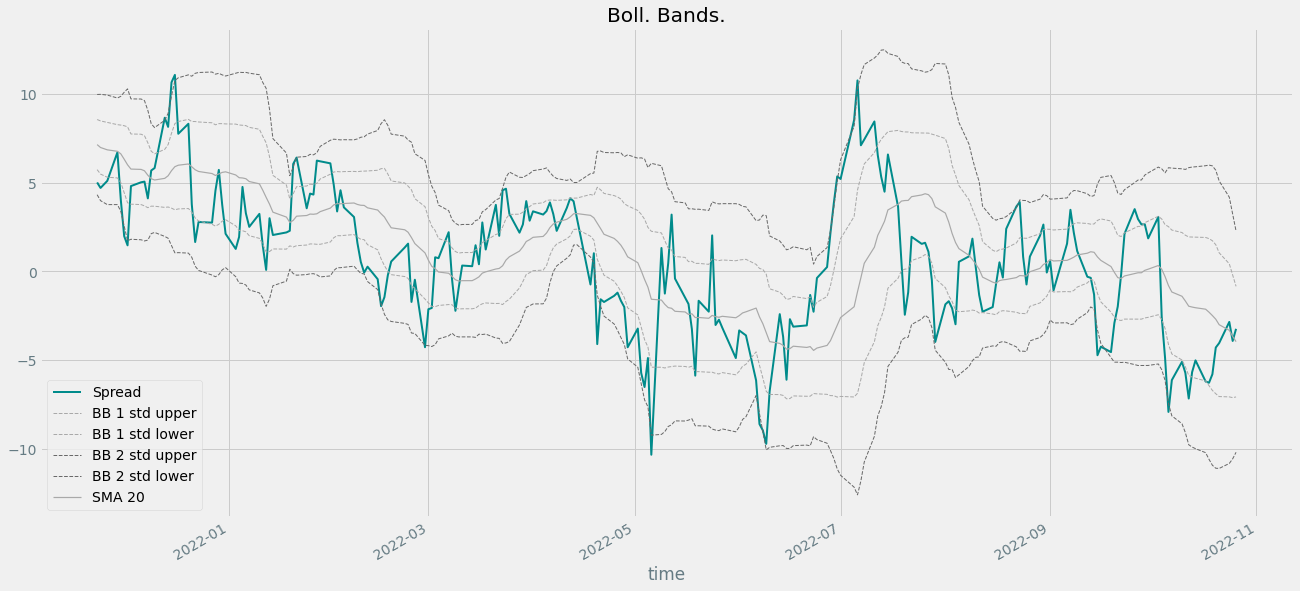

In [812]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

def plot1(df, buysell=False):
    df['Close'].plot(label = 'Spread', color = 'darkcyan', linewidth = 2)
    df['bb_up_1'].plot(label = 'BB 1 std upper', linestyle = '--', linewidth = 1, color = 'darkgray')
    df['bb_low_1'].plot(label = 'BB 1 std lower', linestyle = '--', linewidth = 1, color = 'darkgray')
    df['bb_up_2'].plot(label = 'BB 2 std upper', linestyle = '--', linewidth = 1, color = 'dimgray')
    df['bb_low_2'].plot(label = 'BB 2 std lower', linestyle = '--', linewidth = 1, color = 'dimgray')
    df['sma_20'].plot(label = 'SMA 20',  linewidth = 1.2, color = 'darkgray')
    plt.legend(loc = 'lower left')
    plt.title('Boll. Bands.')
    
    if buysell:
        plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
        plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
    
    plt.show()
    
plot1(df_spread_bb,0)

#### OPTION 2

In [813]:
import plotly.graph_objects as go

def plot2(df, buysell=False):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            increasing_line_color= 'PaleGreen', decreasing_line_color= 'salmon'),
            go.Scatter(x=df.index, y=df.sma_20, line=dict(color='darkgray', width=1), name="SMA 20"),
            go.Scatter(x=df.index, y=df['bb_low_2'], line=dict(color='dimgray', width=1, dash='dot'), name="BB 2 std lower"),
            go.Scatter(x=df.index, y=df['bb_up_2'], line=dict(color='dimgray', width=1, dash='dot'), name="BB 2 std upper"),
            go.Scatter(x=df.index, y=df['bb_low_1'], line=dict(color='darkgray', width=1, dash='dot'), name="BB 1 std lower"),
            go.Scatter(x=df.index, y=df['bb_up_1'], line=dict(color='darkgray', width=1, dash='dot'), name="BB 1 std upper"),])

    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.update_layout(legend=dict(yanchor="top", y=0.1, xanchor="left", x=0.05))
    
    if buysell:
        fig.add_scatter(x=df.index, y=buy_price, mode="markers", marker_symbol="triangle-up", marker=dict(size=10, color="Green"), name="buy")
        fig.add_scatter(x=df.index, y=sell_price, mode="markers", marker_symbol="triangle-down",marker=dict(size=10, color="Red"), name="sell")
        fig.update_layout(xaxis_rangeslider_visible=True)
    
    fig.show()
 
plot2(df_spread_bb,0)

### STRATEGY & POSITIONS

#### STRATEGY 1

In [814]:
# buy and sell at upper and lower bollinger band, exit at sma
def strategy_exit_sma(data, lower_bb, upper_bb, sma_20):
    buy_price = []
    sell_price = []
    bb_signal = []
    position = []
    signal = 0

    # create a zero position list until the first signal
    for i in range(len(data)):
        position.append(0)
      
    for i in range(len(data)):
        # define band crossings
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if position[i-1] == 0:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if position[i-1] == 0:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = -1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        # define sma crossings
        elif data[i - 1] > sma_20[i - 1] and data[i] < sma_20[i]:
            if position[i-1] != 0:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < sma_20[i - 1] and data[i] > sma_20[i]:
            if position[i-1] != 0:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = 0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            position[i] = position[i-1]

    return buy_price, sell_price, bb_signal, position


buy_price, sell_price, bb_signal, position = strategy_exit_sma(
    df_spread_bb["Close"],
    df_spread_bb["bb_low_2"],
    df_spread_bb["bb_up_2"],
    df_spread_bb["sma_20"],
)

#### STRATEGY 2

In [815]:
# buy and sell at upper and lower bollinger band, keep position, no exit
def strategy_no_exit(data, lower_bb, upper_bb):

    buy_price = []
    sell_price = []
    bb_signal = []
    position = []
    signal = 0
    
    # create a zero position list until the first signal
    for i in range(len(data)):
        position.append(0)
    
    for i in range(len(data)):
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = -1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            position[i] = position[i-1]

    return buy_price, sell_price, bb_signal, position


buy_price, sell_price, bb_signal, position = strategy_no_exit(
    df_spread_bb["Close"], df_spread_bb["bb_low_2"], df_spread_bb["bb_up_2"]
)

#### PLOT

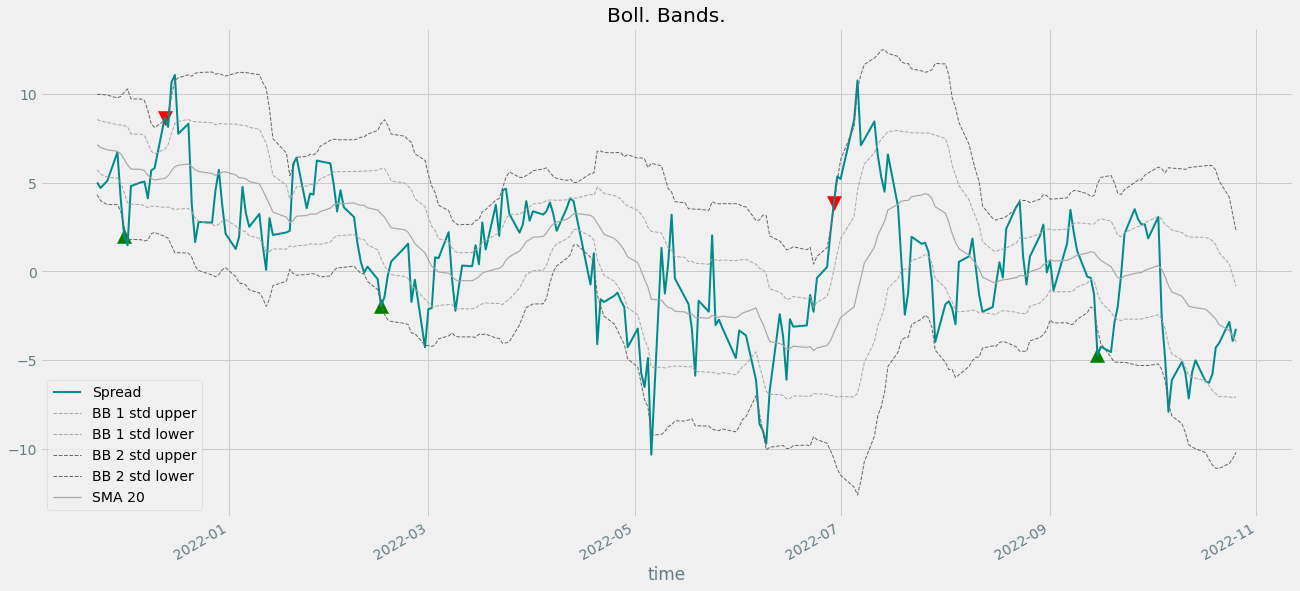

In [816]:
plot1(df_spread_bb,1)

### BACKTEST

Prepare a new df for the strategy signal & positions:

In [829]:
upper_bb = df_spread_bb['bb_up_1']
lower_bb = df_spread_bb['bb_low_1']
close_price = df_spread_bb['Close']
bb_signal_df = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df_spread_bb.index)
#position_df = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df_spread_bb.index)
position_df = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df_spread_bb.index)

frames = [close_price, upper_bb, lower_bb, bb_signal_df, position_df]
strategy = pd.concat(frames, join = 'inner', axis = 1)

Define investment value & cost factors:

In [819]:
avg_slip = 0.001
avg_commission = 0.007
avg_fin_cost = 0.0002
pos_value = 7500
contracts = round(df2['Close'][0],0)
margin_req = 0.3
cash_req = margin_req * pos_value * 2 # required cash


In [820]:
slip = bb_signal_df.bb_signal.abs()*avg_slip*pos_value
commission = bb_signal_df.bb_signal.abs()*avg_commission*contracts*2
fincost = position_df.bb_position.abs()*avg_fin_cost*(2*pos_value-cash_req)

#### BACKTEST & PRINT INITIAL RESULTS

In [831]:
import math
from termcolor import colored as cl

df_spread_bb_ret = pd.DataFrame(np.diff(df_spread_bb['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

# calculate return per bar
for i in range(len(df_spread_bb_ret)):
    try:
        returns = df_spread_bb_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)    
        
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

#number_of_stocks = math.floor(investment_value/df_spread_bb['Close'][-1])
number_of_stocks = math.floor(investment_value/contracts)  # price of the second pair y-b*x
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/cash_req)*100)
print(cl('Profit/Loss (costs excluded): {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit/Loss (costs excluded): {}%'.format(profit_percentage), attrs = ['bold']))

Profit/Loss (costs excluded): 2756.77
Profit/Loss (costs excluded): 61%


Calculate cumulative returns:

In [822]:
cum_inv_ret = bb_investment_ret_df.cumsum()
cum_inv_ret.tail()

,investment_returns
227,2669.17376
228,2689.99846
229,2789.11706
230,2699.89206
231,2756.77196


List orders:

In [823]:
mask = strategy.bb_signal!=0
orders = strategy[mask][['bb_signal']].reset_index()
orders

,time,bb_signal
0,2021-12-01 00:00:00-05:00,1
1,2021-12-13 00:00:00-05:00,-1
2,2022-02-15 00:00:00-05:00,1
3,2022-06-29 00:00:00-04:00,-1
4,2022-09-15 00:00:00-04:00,1


Calculate order returns & open position:

In [830]:
strategy2 = strategy[['bb_signal']].reset_index()
strategy2['cum_return'] = cum_inv_ret

In [827]:
mask = strategy2.bb_signal!=0
orders = strategy2[mask][['bb_signal','cum_return']]
orders = orders.reset_index().dropna()

# values = df.Prices * df.Amount
# df['Values'] = values.where(df.Action == 'Sell', other=-values)

orders['prof_loss'] = orders.cum_return.diff()
# set the fist order profit/loss
orders.at[0, 'prof_loss'] = orders['cum_return'][0]

# set open position profit/loss
orders.at[len(orders), 'prof_loss'] = total_investment_ret - orders.loc[orders.index[-1],'cum_return']
# orders.at[len(orders)-1, 'index'] = len(strategy2)-1
# orders.at[len(orders)-1, 'bb_signal'] = -orders.loc[orders.index[-2],'bb_signal']
orders.at[len(orders)-1, 'cum_return'] = total_investment_ret

orders

,index,bb_signal,cum_return,prof_loss
0,5.0,1.0,-43.13427,-43.13427
1,13.0,-1.0,597.28460,640.41887
2,57.0,1.0,1479.18533,881.90073
3,149.0,-1.0,1795.77140,316.58607
4,203.0,1.0,2672.96686,877.19546
5,NaN,NaN,2756.77000,83.80314


#### RESULT SUMMARY

In [840]:
print(cl('Gross return: {}'.format(round(sum(orders['prof_loss']), 2)), attrs = ['bold']))
print(cl('Financial cost: {}'.format(-fincost.sum().round(1)), attrs = ['bold']))
print(cl('Total slip: {}'.format(-slip.sum().round(1)), attrs = ['bold']))
print(cl('Total commisson: {}'.format(-commission.sum().round(1)), attrs = ['bold']))
total_cost = slip.sum().round(1) + commission.sum().round(1)+fincost.sum().round(1)
print(cl('Net return: {}'.format(round(sum(orders['prof_loss']), 2) - total_cost), attrs = ['bold']))

Gross return: 2756.77
Financial cost: -478.8
Total slip: -37.5
Total commisson: -6.3
Net return: 2234.17
gross return: 2756.77
financial cost: -478.8
total slip: -37.5
total commission: -6.3
net return: 2234.17
